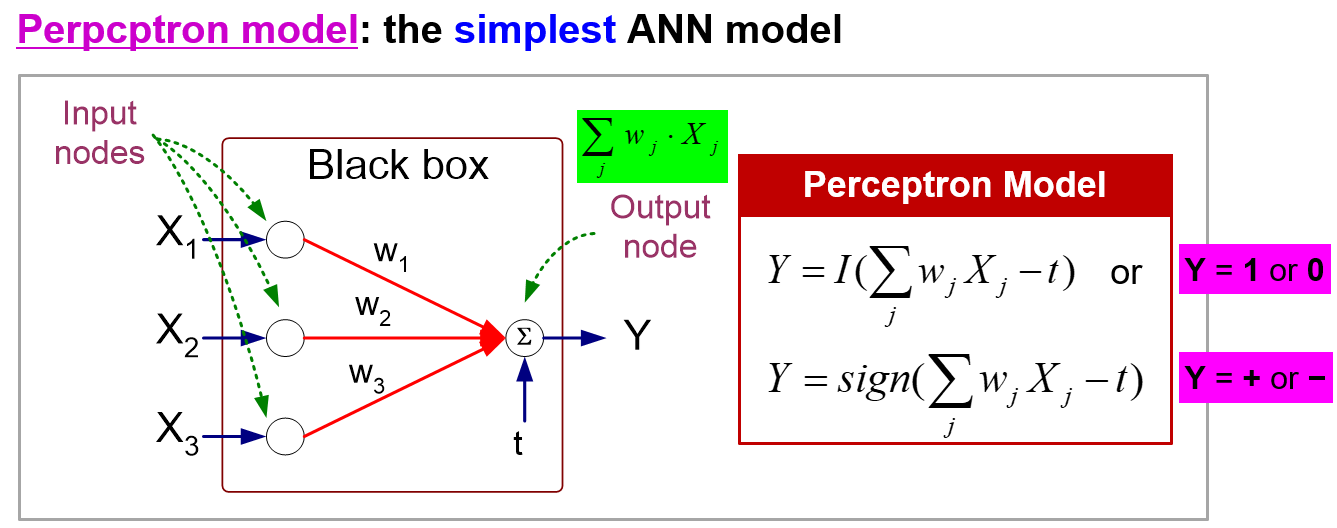

In [ ]:
# 필요한 기본 package 불러오기
import numpy as np
import pandas as pd

# !pip install scikit-learn (sklearn 설치 시)
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# **1-1. Binary Classification using Perceptron**

In [ ]:
# Breast Cancer dataset 불러오기
data = load_breast_cancer()

X = data.data
y = data.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
pd.DataFrame(X).head() # 데이터 형태 파악

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Train data와 Test data 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [ ]:
# Perceptron model 정의
clf = Perceptron(max_iter=1000, eta0=0.1)

# 모델 학습
clf.fit(X_train, y_train)

Perceptron(eta0=0.1)

In [ ]:
# 모델 기반 예측
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [ ]:
# 정확도(accuracy) 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.935672514619883


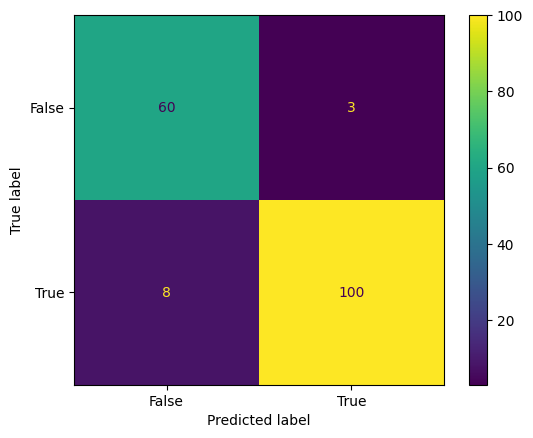

In [ ]:
# Confusion matrix 평가
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()

# **1-2. Binary Classification using Multilayer Perceptron**

In [ ]:
pd.DataFrame(X_train).head() # 데이터 형태 파악

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
1,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
2,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
3,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
4,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


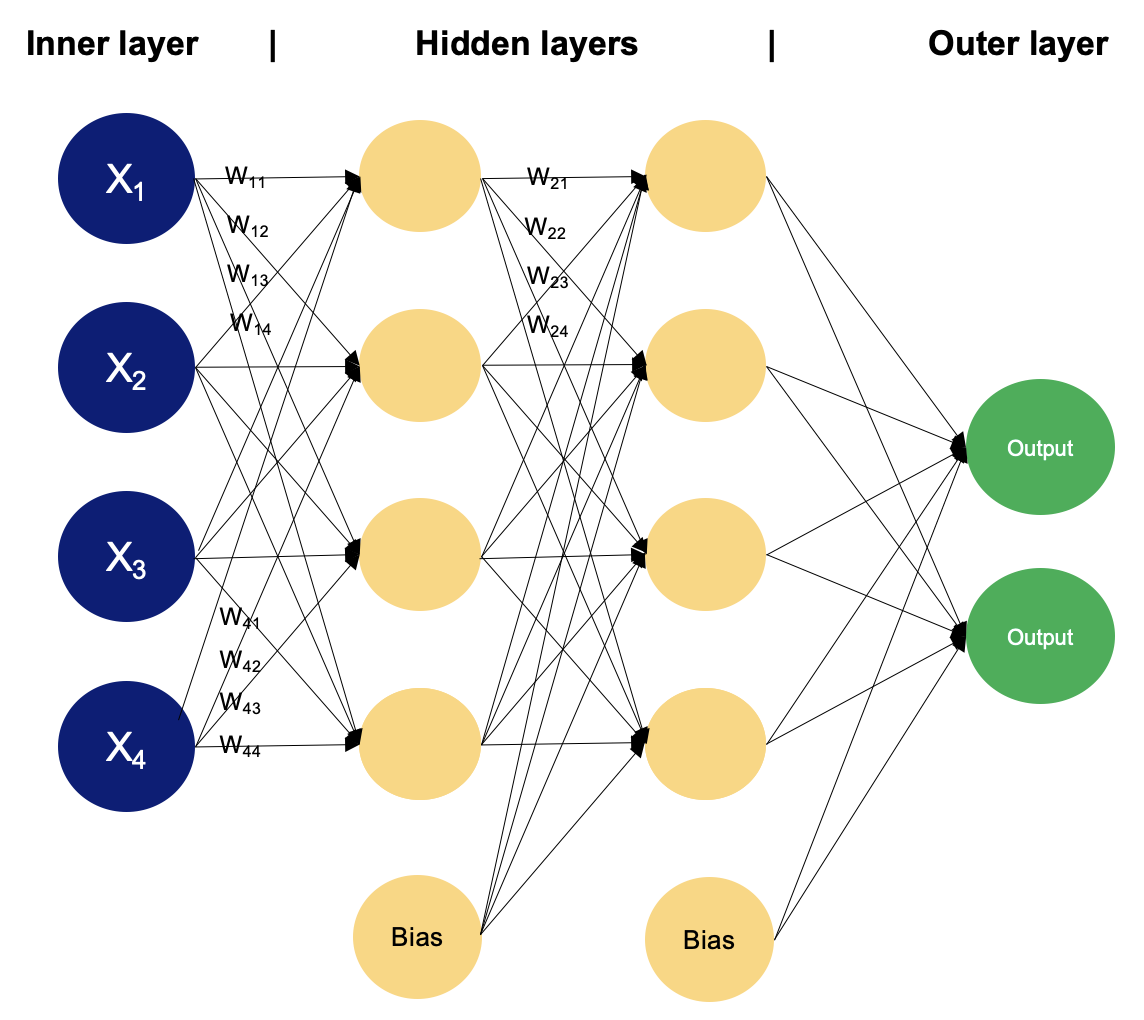

In [ ]:
# Multilayer perceptron (no hidden layer)
mlp_1 = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300)

In [ ]:
# Multilayer perceptron (with hidden layer)
mlp_2 = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

Accuracy of Perceptron: 0.94
Accuracy of MLP: 0.94


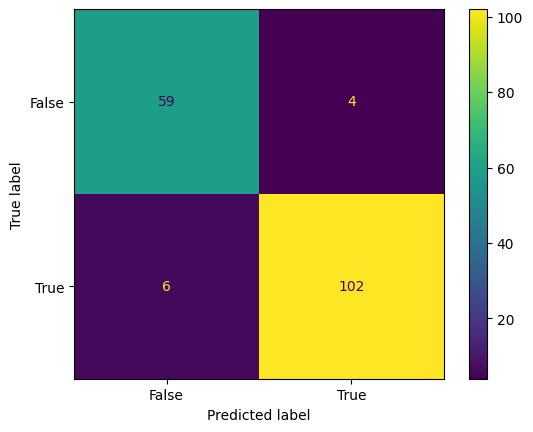

In [ ]:
# Perceptron 결과 (비교용)
print('Accuracy of Perceptron: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# Multilayer perceptron (no hidden layer) 결과
y_pred_1 = mlp_1.predict(X_test)
print('Accuracy of MLP: {:.2f}'.format(accuracy_score(y_test, y_pred_1)))

# Confusion matrix 평가
conf_matrix = confusion_matrix(y_test, y_pred_1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()

Accuracy of Perceptron: 0.94
Accuracy of MLP: 0.95


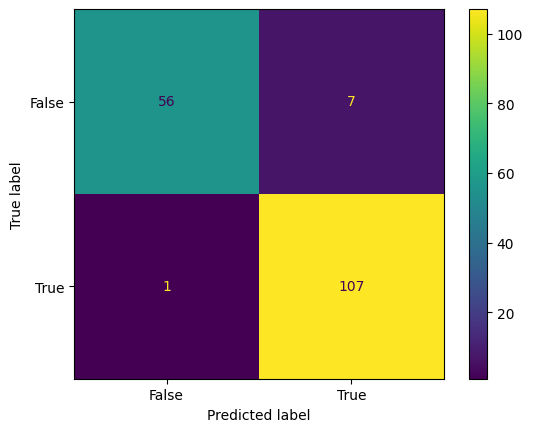

In [ ]:
# Perceptron 결과 (비교용)
print('Accuracy of Perceptron: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# Multilayer perceptron (no hidden layer) 결과
y_pred_2 = mlp_2.predict(X_test)
print('Accuracy of MLP: {:.2f}'.format(accuracy_score(y_test, y_pred_2)))

# Confusion matrix 평가
conf_matrix = confusion_matrix(y_test, y_pred_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()

### **GridsearchCV**

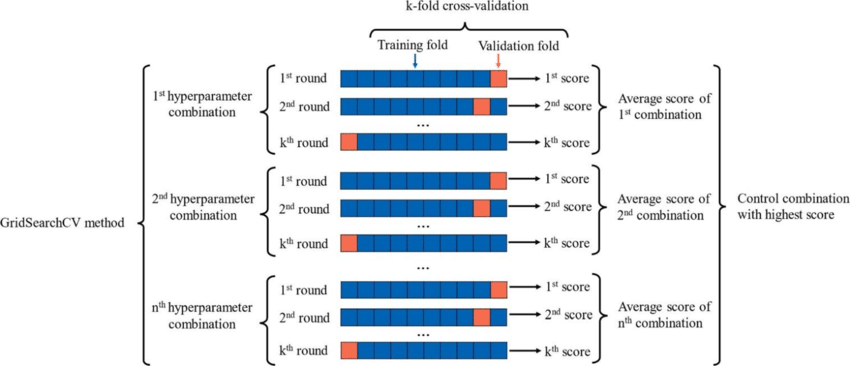

In [ ]:
'''
모델 파라미터 설정 참고.
MLP (classifier) 파라미터 설정: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
MLP (Regressor) 파라미터 설정: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
'''

# Hyperparameter tuning for MLP (GridsearchCV)
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp_2, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                                     max_iter=300),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40),
                                                (100, 50, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100, 150],
                         'solver': ['sgd', 'adam']})

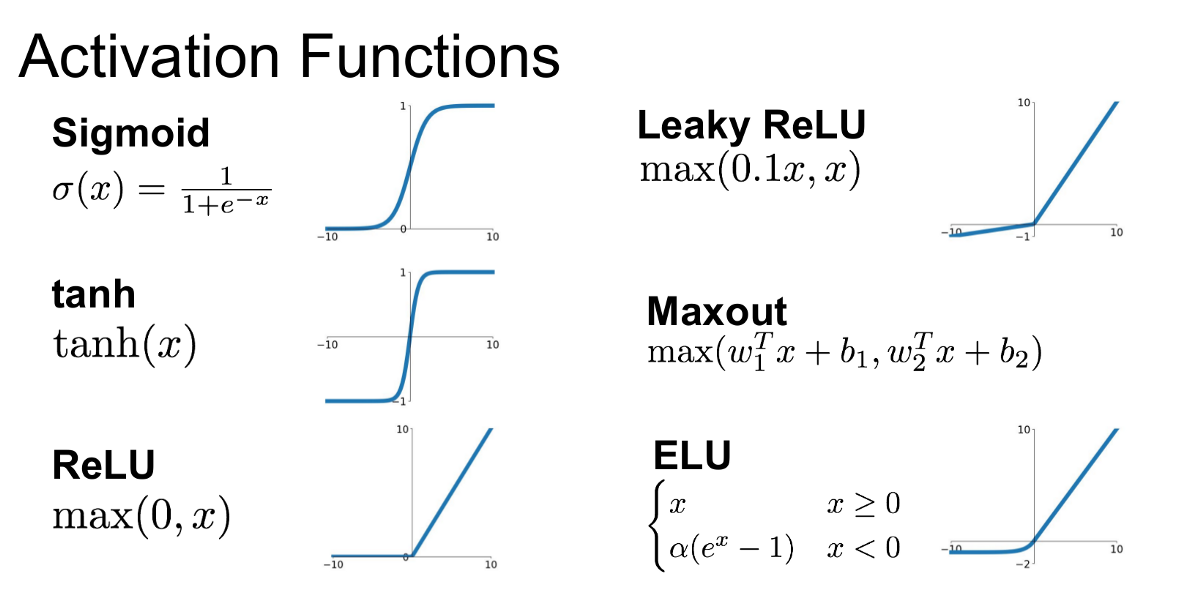

In [ ]:
grid_scores = grid.cv_results_
pd.DataFrame(grid_scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.896278,0.410164,0.016463,0.007766,tanh,0.0001,"(150, 100, 50)",constant,50,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.9500,0.8500,0.8625,0.873418,0.886076,0.884399,0.034899,86
1,2.239321,0.216014,0.010975,0.001858,tanh,0.0001,"(150, 100, 50)",constant,50,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.9375,0.8875,0.9375,0.886076,0.924051,0.914525,0.023178,31
2,2.987033,0.427821,0.009260,0.002535,tanh,0.0001,"(150, 100, 50)",constant,100,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.9375,0.8500,0.9000,0.860759,0.835443,0.876741,0.037172,97
3,4.354396,0.901079,0.015191,0.006768,tanh,0.0001,"(150, 100, 50)",constant,100,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.9250,0.8875,0.9625,0.898734,0.898734,0.914494,0.026983,32
4,3.133412,0.964673,0.010700,0.002815,tanh,0.0001,"(150, 100, 50)",constant,150,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.9625,0.8375,0.8875,0.860759,0.848101,0.879272,0.044842,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.236760,0.015084,0.001925,0.000291,relu,0.05,"(100, 50, 30)",adaptive,50,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.9250,0.8750,0.9000,0.911392,0.911392,0.904557,0.016767,62
140,0.417451,0.101338,0.003622,0.003540,relu,0.05,"(100, 50, 30)",adaptive,100,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.6250,0.8875,0.6250,0.873418,0.379747,0.678133,0.187963,125
141,0.800612,0.120983,0.001463,0.000044,relu,0.05,"(100, 50, 30)",adaptive,100,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.9250,0.9000,0.9250,0.911392,0.911392,0.914557,0.009487,27
142,0.762990,0.347760,0.002456,0.001927,relu,0.05,"(100, 50, 30)",adaptive,150,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.3750,0.8500,0.9375,0.632911,0.873418,0.733766,0.206594,118


In [ ]:
print(grid.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'adam'}


# **2-1. Multi-class Classification using Perceptron**

In [ ]:
# 필요한 기본 package 불러오기
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# MNIST dataset 불러오기
mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target.astype(int)

print(X.shape)
print(y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


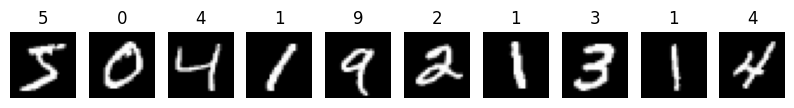

In [ ]:
# MNIST 데이터셋 시각화
def plot_mnist_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images.values[i].reshape(28, 28), cmap='gray')
        plt.title(f'{labels[i]}')
        plt.axis('off')
    plt.show()

# 샘플 이미지 10개 시각화
plot_mnist_images(X[:10], y[:10])

In [ ]:
# Train data와 Test data 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49000, 784)
(21000, 784)
(49000,)
(21000,)


In [ ]:
# Perceptron model 정의
perceptron = Perceptron(max_iter=1000, eta0=0.1)

# 모델 학습
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1)

In [ ]:
# 모델 기반 예측
y_pred = perceptron.predict(X_test)
print(y_pred)

[8 4 8 ... 2 9 5]


In [ ]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8764285714285714


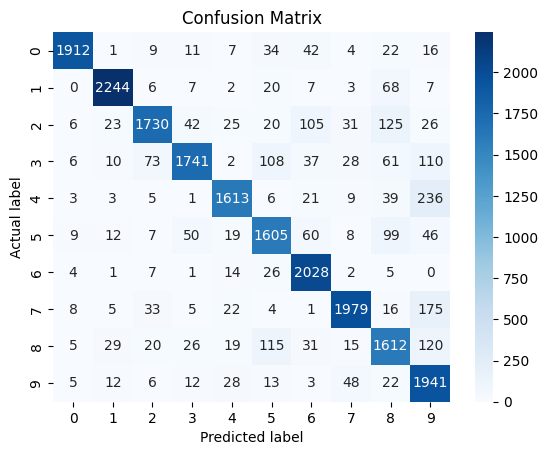

In [ ]:
# Confusion matrix 평가
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot = True, cmap= 'Blues', fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 각 평가지표 종합 산출
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2058
           1       0.96      0.95      0.95      2364
           2       0.91      0.81      0.86      2133
           3       0.92      0.80      0.86      2176
           4       0.92      0.83      0.87      1936
           5       0.82      0.84      0.83      1915
           6       0.87      0.97      0.92      2088
           7       0.93      0.88      0.90      2248
           8       0.78      0.81      0.79      1992
           9       0.73      0.93      0.81      2090

    accuracy                           0.88     21000
   macro avg       0.88      0.88      0.88     21000
weighted avg       0.88      0.88      0.88     21000



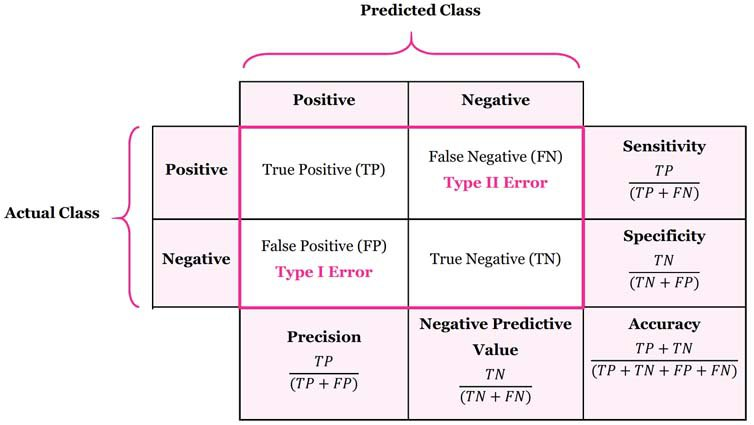

# **2-2. Multi-class Classification using Multilayer Perceptron**

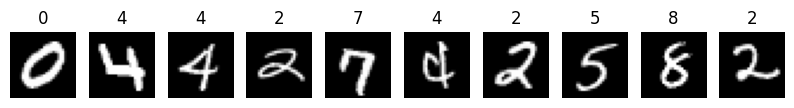

In [ ]:
# MNIST 데이터셋 시각화
def plot_mnist_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images.values[i].reshape(28, 28), cmap='gray')
        plt.title(f'{labels.values[i]}')
        plt.axis('off')
    plt.show()

# 샘플 이미지 10개 시각화
plot_mnist_images(X_train[:10], y_train[:10])

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
y_pred = mlp_clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.97


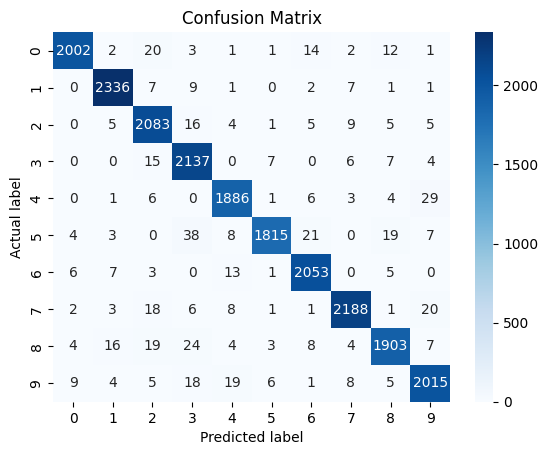

In [ ]:
# Confusion matrix 평가
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot = True, cmap= 'Blues', fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 각 평가지표 종합 산출
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2058
           1       0.98      0.99      0.99      2364
           2       0.96      0.98      0.97      2133
           3       0.95      0.98      0.97      2176
           4       0.97      0.97      0.97      1936
           5       0.99      0.95      0.97      1915
           6       0.97      0.98      0.98      2088
           7       0.98      0.97      0.98      2248
           8       0.97      0.96      0.96      1992
           9       0.96      0.96      0.96      2090

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000

